In [18]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from theano import shared

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

In [19]:
# 1. generate the artificial dataset.
N = 10000

X = np.random.uniform(0, 1, N)
def DGP(x):
    obs_y = []
    for n in range(len(x)):
        if x[n] > (0.7 + np.random.normal(0.0, 0.0001, 1)[0]):
            obs_y.append(1.0)
        else:
            obs_y.append(0.0)

    return obs_y

In [20]:
X_shared = shared(X)
obs_y = DGP(X)

In [21]:
# 2. model that data with a simple regression model
with pm.Model() as exercise3:

    intercept = pm.Normal('intercept', mu=0.0, sd=.1)
    coeff = pm.Normal('beta', mu=0.0, sd=.1)

    expected_value = pm.math.invlogit((coeff * X_shared) + intercept)
    y = pm.Bernoulli('y', expected_value, observed=obs_y)

In [23]:
with exercise3:
    trace = pm.sample(draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, intercept]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:33<00:00, 180.59draws/s]
The acceptance probability does not match the target. It is 0.8905977000551636, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


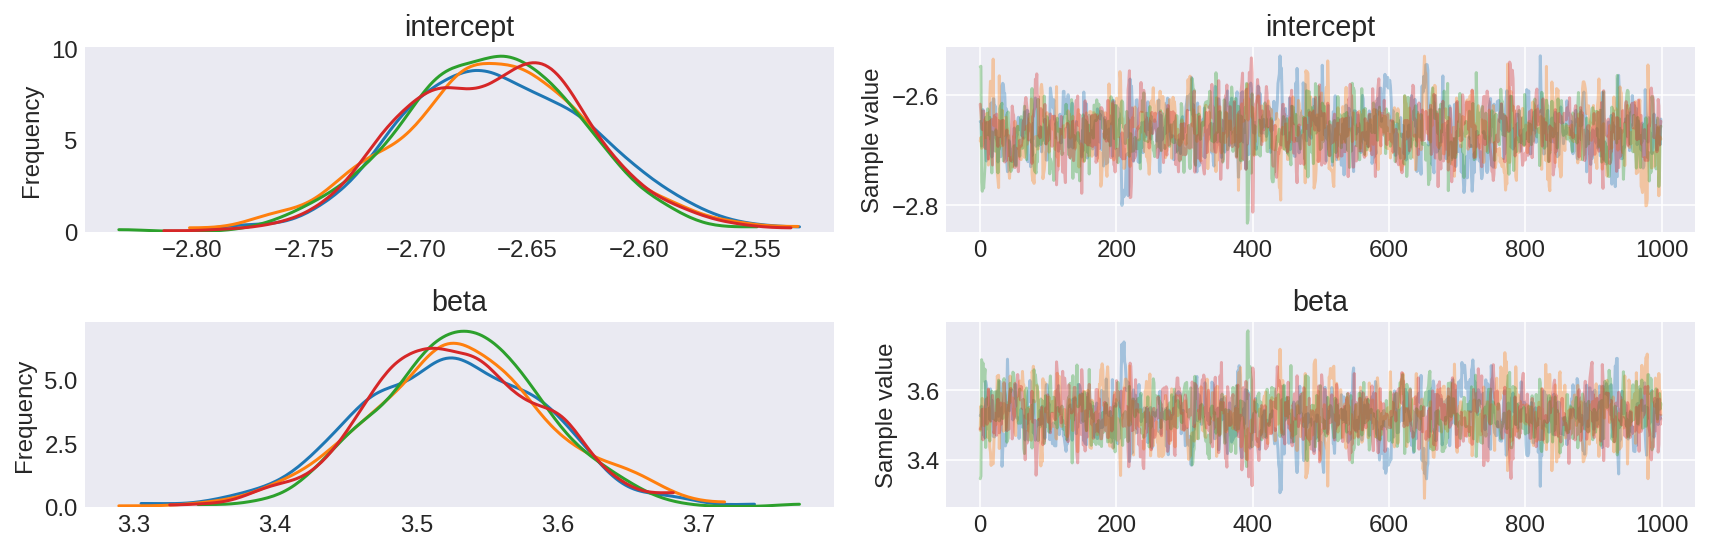

In [24]:
pm.traceplot(trace, ['intercept', 'beta']);

In [9]:
# 3. posterior predictive checks
TEST_N = 1000
testX = np.random.uniform(0, 1, TEST_N)
testY = DGP(testX)

X_shared.set_value(testX)

ppc = pm.sample_ppc(trace, model=exercise3, samples=500)
y_preds = ppc['y']

print("y_preds shape = ", y_preds.shape)

expected_y_pred = np.reshape(np.mean(y_preds, axis=0), [-1])

100%|██████████| 500/500 [00:01<00:00, 428.83it/s]

y_preds shape =  (500, 1000)


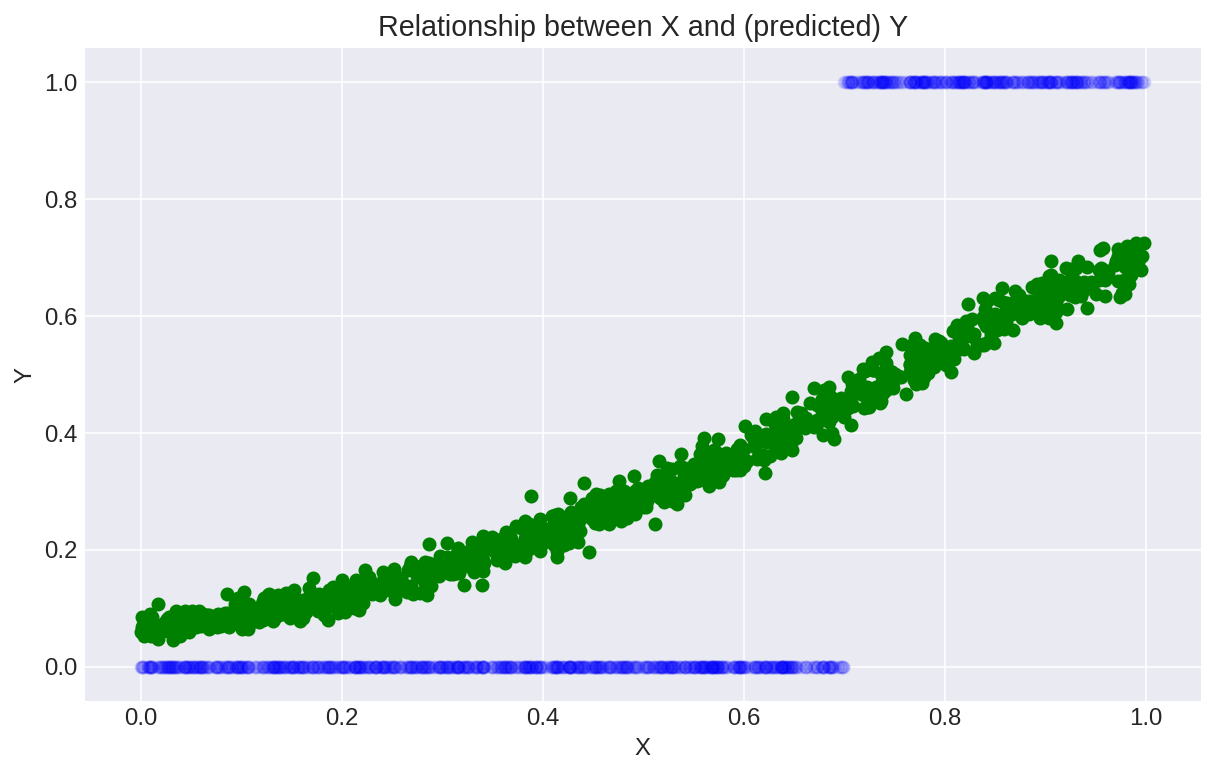

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(testX, expected_y_pred, c='g')
plt.scatter(testX, testY, c='b', alpha=0.1)
plt.title("Relationship between X and (predicted) Y")
plt.xlabel("X")
plt.ylabel("Y")

plt.show()